<a href="https://www.kaggle.com/code/zain18j2000/yolov8-with-sixray?scriptVersionId=157319664" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current dpip install ultralyticsirectory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **IMPORT PACKAGES**

In [1]:
!pip install ultralytics
!pip install roboflow
from ultralytics import YOLO 
from IPython.display import Image
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.231 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5310.7/8062.4 GB disk)


# **LOAD THE TRAINING DATASET**

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="tAFRYqzjQXahvMhjPcZv")
project = rf.workspace("sixray-dpgc6").project("weapon_detection-cuahn")
dataset = project.version(4).download("yolov8")

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.231, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to weapon_detection-4 in yolov8:: 100%|██████████| 6008/6008 [00:00<00:00, 6100.73it/s]


# **LOAD THE MODEL**

In [3]:
yolo8_model_detection =YOLO('yolov8m.pt')
#yolo8_model_detection.predict(source='https://upload.wikimedia.org/wikipedia/commons/thumb/3/3e/I-80_Eastshore_Fwy.jpg/1200px-I-80_Eastshore_Fwy.jpg',save_txt=True ,save=True,exist_ok=True)
#Image(filename='runs/detect/predict/1200px-I-80_Eastshore_Fwy.jpg', height=300,width=500) 

100%|██████████| 49.7M/49.7M [00:00<00:00, 215MB/s] 


# **COPY DATASET IN A NEW DIRECTORY**

In [6]:
import os 
os.makedirs('datasets',exist_ok = True)
!cp -r /kaggle/working/weapon_detection-4 datasets/SixRayFull-2

# **TRAIN MODEL**

In [8]:
# Define dataset path, epochs, image-size, Bacth and output directory.
yolo8_model_detection.train(data= '/kaggle/working/datasets/SixRayFull-2/data.yaml', epochs=100, imgsz=640, batch=64,project='YOLO_weights',name='SIXray_Output',exist_ok=True, device=[0, 1])

Ultralytics YOLOv8.0.231 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
                                                       CUDA:1 (Tesla T4, 15110MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/kaggle/working/datasets/SixRayFull-2/data.yaml, epochs=100, time=None, patience=50, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=[0, 1], workers=8, project=YOLO_weights, name=SIXray_Output, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


TensorBoard: Start with 'tensorboard --logdir YOLO_weights/SIXray_Output', view at http://localhost:6006/
Overriding model.yaml nc=80 with nc=6
Transferred 469/475 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/working/datasets/SixRayFull-2/weapon_detection-4/train/labels.cache... 2304 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2304/2304 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/datasets/SixRayFull-2/weapon_detection-4/valid/labels.cache... 466 images, 0 backgrounds, 0 corrupt: 100%|██████████| 466/466 [00:00<?, ?it/s]
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Plotting labels to YOLO_weights/SIXray_Output/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      14.1G      1.269      2.446      1.417        168        640: 100%|██████████| 36/36 [00:42<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.19it/s]


                   all        466       1127       0.58      0.358      0.379      0.267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      14.3G      1.037      1.139      1.244        155        640: 100%|██████████| 36/36 [00:39<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.25it/s]


                   all        466       1127      0.687      0.316      0.328      0.212

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      14.3G      1.101      1.103      1.331        152        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.21it/s]


                   all        466       1127       0.55      0.281      0.197      0.123

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      14.3G      1.155      1.144      1.367        139        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.24it/s]


                   all        466       1127      0.476      0.204       0.19      0.123

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      14.4G      1.113      1.067      1.344        138        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.25it/s]


                   all        466       1127      0.615      0.441      0.462      0.308

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      14.3G      1.056      0.967      1.311        101        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.23it/s]


                   all        466       1127      0.536      0.346       0.36      0.234

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      14.4G      1.071     0.9704      1.319        116        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.27it/s]


                   all        466       1127      0.712      0.475      0.526      0.359

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      14.4G      1.044     0.9159      1.283        112        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.25it/s]


                   all        466       1127      0.558      0.525      0.582      0.421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      14.4G      1.025     0.8924      1.284        153        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.27it/s]


                   all        466       1127      0.886      0.477      0.551      0.384

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      14.3G     0.9856       0.84      1.254        157        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.24it/s]


                   all        466       1127      0.864      0.522      0.573      0.401

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      14.3G     0.9594     0.8191       1.24        115        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.27it/s]


                   all        466       1127      0.943      0.524      0.595      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      14.3G     0.9513     0.7868      1.228        137        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]


                   all        466       1127      0.908      0.546      0.754      0.584

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      14.3G     0.9749     0.8026      1.252        163        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.28it/s]


                   all        466       1127      0.932      0.582       0.63       0.46

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      14.3G       0.93     0.7464      1.213        175        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.24it/s]


                   all        466       1127      0.885      0.541      0.613      0.454

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      14.4G     0.9414     0.7641      1.225        167        640: 100%|██████████| 36/36 [00:38<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.27it/s]


                   all        466       1127      0.811      0.638      0.755      0.556

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      14.3G     0.9251     0.7134      1.213        163        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]


                   all        466       1127      0.749      0.682      0.845      0.636

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      14.3G     0.8874     0.6971      1.183        144        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]


                   all        466       1127      0.756      0.633      0.643      0.484

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      14.4G     0.8935     0.6916      1.185        162        640: 100%|██████████| 36/36 [00:39<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.25it/s]


                   all        466       1127      0.765       0.59      0.806      0.637

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      14.3G     0.8897     0.6776      1.192        133        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]


                   all        466       1127       0.87      0.685      0.711      0.521

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      14.4G     0.8784     0.6651      1.189        178        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.24it/s]


                   all        466       1127      0.801      0.713      0.735      0.564

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      14.4G     0.8781     0.6679      1.168        155        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.27it/s]


                   all        466       1127      0.935      0.583      0.707      0.542

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      14.4G     0.8633     0.6462      1.161        154        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.25it/s]


                   all        466       1127      0.843      0.587      0.827      0.674

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      14.4G      0.852     0.6401      1.148        161        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.25it/s]


                   all        466       1127      0.945      0.643      0.764      0.596

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      14.4G     0.8477     0.6298      1.156        124        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.25it/s]


                   all        466       1127      0.756      0.706      0.682      0.522

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      14.4G     0.8453     0.6213      1.164        149        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]


                   all        466       1127      0.956        0.6      0.678       0.52

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      14.4G     0.8446     0.6091      1.156        138        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.25it/s]


                   all        466       1127      0.934      0.646      0.696      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      14.3G     0.8186     0.5901      1.129        135        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]


                   all        466       1127      0.905      0.701      0.756       0.59

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      14.4G     0.8229     0.5893      1.139        117        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.27it/s]


                   all        466       1127      0.905      0.627      0.707      0.544

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      14.4G     0.8069     0.5844      1.116        161        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]


                   all        466       1127      0.927      0.684      0.729       0.53

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      14.3G      0.824     0.5882      1.139        127        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]


                   all        466       1127      0.921       0.65      0.684      0.528

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      14.3G     0.8005     0.5766      1.118        155        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.27it/s]


                   all        466       1127      0.907      0.644      0.691      0.553

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      14.3G     0.8063     0.5795      1.138        165        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.27it/s]


                   all        466       1127      0.938      0.753      0.836      0.657

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      14.4G     0.7997     0.5706      1.122        150        640: 100%|██████████| 36/36 [00:39<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]


                   all        466       1127      0.946      0.712      0.824      0.645

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      14.4G      0.781     0.5557      1.106        176        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.27it/s]


                   all        466       1127      0.968      0.703      0.755      0.601

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      14.4G     0.8069     0.5746      1.132        137        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]


                   all        466       1127        0.9      0.679      0.725      0.579

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      14.4G      0.772     0.5395      1.103        153        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.27it/s]


                   all        466       1127      0.901      0.712       0.75      0.606

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      14.3G     0.7721     0.5471      1.114        152        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]


                   all        466       1127      0.938      0.687      0.747      0.574

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      14.3G     0.7631     0.5346      1.103        151        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.25it/s]


                   all        466       1127       0.96      0.695      0.761      0.596

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      14.4G     0.7608     0.5195      1.097        124        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.23it/s]


                   all        466       1127      0.956      0.702       0.74       0.59

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      14.4G     0.7682     0.5335      1.104        139        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]


                   all        466       1127      0.936      0.675      0.789       0.62

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      14.3G     0.7519     0.5107      1.096        136        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]


                   all        466       1127      0.972      0.697      0.731      0.577

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      14.4G     0.7499     0.5178      1.094        147        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]


                   all        466       1127      0.971      0.687      0.746      0.594

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      14.4G     0.7533     0.5103      1.094        138        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.24it/s]


                   all        466       1127      0.952      0.702      0.732      0.592

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      14.3G     0.7406     0.5067      1.089        140        640: 100%|██████████| 36/36 [00:39<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]


                   all        466       1127      0.913      0.694      0.742      0.608

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      14.3G     0.7442     0.5017      1.088        143        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]


                   all        466       1127      0.966      0.684      0.755      0.605

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      14.3G     0.7379     0.5004      1.086        108        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]


                   all        466       1127      0.965      0.748      0.773      0.638

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      14.4G     0.7395     0.5054      1.085        131        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.25it/s]


                   all        466       1127        0.9      0.761        0.8      0.654

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      14.4G     0.7153     0.4951      1.077        134        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.25it/s]


                   all        466       1127      0.768      0.719      0.758      0.609

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      14.4G     0.7004     0.4774      1.062        155        640: 100%|██████████| 36/36 [00:39<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.24it/s]


                   all        466       1127      0.961      0.707       0.73      0.595

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      14.4G     0.7132     0.4815      1.073        146        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]


                   all        466       1127      0.971      0.706      0.758      0.593

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      14.3G     0.7063     0.4812      1.074        155        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.25it/s]


                   all        466       1127      0.951      0.679      0.764      0.621

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      14.3G      0.716     0.4852      1.067        177        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]


                   all        466       1127      0.973      0.688       0.78      0.615

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      14.4G     0.7114     0.4734      1.074        178        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]


                   all        466       1127      0.942      0.752      0.939      0.753

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      14.4G     0.6993     0.4693      1.064        169        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]


                   all        466       1127      0.967      0.685      0.917      0.627

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      14.3G     0.7015     0.4716      1.066        172        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.25it/s]


                   all        466       1127      0.973      0.741      0.951      0.735

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      14.3G     0.6976     0.4669      1.064        146        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]


                   all        466       1127       0.96      0.704      0.773      0.619

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      14.4G      0.691     0.4615      1.051        142        640: 100%|██████████| 36/36 [00:39<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]


                   all        466       1127      0.737      0.899      0.865      0.674

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      14.3G     0.6938     0.4626      1.065        152        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.27it/s]


                   all        466       1127      0.968        0.7      0.781      0.612

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      14.4G     0.6901     0.4577      1.054        164        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.25it/s]


                   all        466       1127      0.918      0.908      0.944       0.79

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      14.4G     0.6705     0.4425       1.04        158        640: 100%|██████████| 36/36 [00:39<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.25it/s]


                   all        466       1127      0.936      0.902      0.966      0.777

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      14.4G     0.6751     0.4455      1.037        169        640: 100%|██████████| 36/36 [00:39<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.25it/s]


                   all        466       1127      0.944       0.91      0.938      0.775

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      14.4G      0.669     0.4514      1.059        125        640: 100%|██████████| 36/36 [00:39<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.25it/s]


                   all        466       1127       0.96      0.869      0.916      0.713

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      14.4G     0.6724     0.4463      1.049        139        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]


                   all        466       1127      0.901       0.88      0.891      0.739

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      14.4G     0.6654     0.4317      1.038        154        640: 100%|██████████| 36/36 [00:39<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]


                   all        466       1127      0.873      0.893      0.915      0.731

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      14.4G     0.6644     0.4368      1.045        148        640: 100%|██████████| 36/36 [00:39<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.24it/s]


                   all        466       1127       0.91       0.89      0.909       0.77

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      14.3G     0.6479     0.4346      1.028        159        640: 100%|██████████| 36/36 [00:39<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.27it/s]


                   all        466       1127      0.752      0.896      0.907      0.755

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      14.4G      0.664     0.4303      1.044        150        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]


                   all        466       1127      0.979      0.755      0.944      0.776

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      14.4G     0.6492     0.4224       1.02        131        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.25it/s]


                   all        466       1127      0.779      0.937      0.924      0.776

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      14.4G      0.636     0.4293      1.023        137        640: 100%|██████████| 36/36 [00:39<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.25it/s]


                   all        466       1127      0.897      0.892       0.91      0.736

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      14.4G     0.6418     0.4203      1.034        140        640: 100%|██████████| 36/36 [00:39<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.22it/s]


                   all        466       1127      0.937      0.878      0.916      0.746

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      14.4G     0.6381     0.4234      1.026        129        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]


                   all        466       1127      0.959      0.926      0.945      0.788

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      14.4G     0.6271     0.4065       1.02        135        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]


                   all        466       1127      0.861      0.927      0.925       0.78

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      14.4G     0.6424     0.4148      1.022        151        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]


                   all        466       1127      0.887      0.891      0.915      0.757

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      14.3G     0.6175      0.398      1.005        146        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.23it/s]


                   all        466       1127      0.934      0.881      0.906       0.78

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      14.4G     0.6221     0.4104      1.021        151        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]


                   all        466       1127      0.967       0.92      0.945      0.813

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      14.4G     0.6053     0.3904      1.004        163        640: 100%|██████████| 36/36 [00:39<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]


                   all        466       1127      0.965      0.883      0.931      0.801

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      14.4G      0.595     0.3938          1        127        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]


                   all        466       1127       0.93       0.94      0.945      0.806

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      14.4G     0.6034     0.3901      1.001        146        640: 100%|██████████| 36/36 [00:39<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.25it/s]


                   all        466       1127      0.977      0.911      0.947      0.788

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      14.4G     0.6019     0.3954      1.011        160        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.27it/s]


                   all        466       1127      0.975       0.88      0.924      0.759

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      14.4G     0.5954      0.393       1.01        146        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]


                   all        466       1127      0.947      0.934      0.943      0.816

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      14.3G     0.5971     0.3988      1.008        135        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]


                   all        466       1127      0.957      0.917      0.945      0.804

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      14.4G      0.594     0.3794      1.004        156        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.25it/s]


                   all        466       1127      0.931      0.892      0.916      0.794

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      14.3G     0.5774     0.3687      0.991        163        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.27it/s]


                   all        466       1127      0.851      0.898      0.912      0.789

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      14.4G     0.5798     0.3764     0.9977        164        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]


                   all        466       1127      0.929      0.889      0.908      0.773

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      14.4G      0.573     0.3781     0.9969        198        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]


                   all        466       1127      0.959      0.865      0.911      0.788

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      14.3G      0.583     0.3803      1.003        155        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.25it/s]


                   all        466       1127      0.973      0.871      0.906      0.771

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      14.4G     0.5585     0.3617     0.9905        138        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.27it/s]


                   all        466       1127      0.972      0.871      0.906       0.78

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      14.4G     0.5637     0.3662     0.9924        126        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.27it/s]


                   all        466       1127       0.97       0.87      0.909      0.774

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      14.4G     0.5653     0.3701      0.995        149        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]


                   all        466       1127      0.962      0.879      0.913      0.785

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      14.4G     0.5595     0.3662     0.9932        127        640: 100%|██████████| 36/36 [00:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.27it/s]


                   all        466       1127       0.97      0.871      0.907      0.772
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      14.3G     0.4737     0.2577     0.9471         75        640: 100%|██████████| 36/36 [00:41<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.27it/s]


                   all        466       1127      0.953      0.883      0.907      0.776

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      14.3G     0.4682     0.2583     0.9429         74        640: 100%|██████████| 36/36 [00:38<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]


                   all        466       1127       0.96      0.876      0.934      0.815

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      14.3G     0.4641     0.2523     0.9462         82        640: 100%|██████████| 36/36 [00:38<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]


                   all        466       1127      0.961      0.875      0.935      0.815

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      14.3G     0.4602      0.254     0.9338         78        640: 100%|██████████| 36/36 [00:38<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]


                   all        466       1127      0.958      0.892      0.947      0.831

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      14.3G     0.4484     0.2471     0.9465         61        640: 100%|██████████| 36/36 [00:38<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.27it/s]


                   all        466       1127      0.925      0.921      0.947       0.83

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      14.3G     0.4423     0.2395      0.929         63        640: 100%|██████████| 36/36 [00:38<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.25it/s]


                   all        466       1127      0.923      0.929      0.948      0.825

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      14.3G     0.4403     0.2427     0.9376         82        640: 100%|██████████| 36/36 [00:38<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]


                   all        466       1127      0.955      0.894      0.948      0.822

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      14.3G     0.4379     0.2418     0.9281         71        640: 100%|██████████| 36/36 [00:38<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]


                   all        466       1127      0.968      0.874      0.937      0.818

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      14.3G     0.4351     0.2385     0.9202         83        640: 100%|██████████| 36/36 [00:38<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]


                   all        466       1127       0.97      0.873      0.938      0.816

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      14.3G      0.437     0.2404     0.9276         82        640: 100%|██████████| 36/36 [00:38<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]


                   all        466       1127      0.969      0.876      0.938      0.815

100 epochs completed in 1.320 hours.
Optimizer stripped from YOLO_weights/SIXray_Output/weights/last.pt, 52.0MB
Optimizer stripped from YOLO_weights/SIXray_Output/weights/best.pt, 52.0MB

Validating YOLO_weights/SIXray_Output/weights/best.pt...
Ultralytics YOLOv8.0.231 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
                                                       CUDA:1 (Tesla T4, 15110MiB)
Model summary (fused): 218 layers, 25843234 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:09<00:00,  1.19s/it]


                   all        466       1127      0.958      0.892      0.947      0.831
                   Gun        466        645      0.983      0.983      0.993      0.867
                Hammer        466          1      0.826          1      0.995      0.995
                 Knife        466        319      0.969      0.915      0.971       0.77
                Pliers        466         84      0.996      0.964       0.99      0.851
              Scissors        466          4          1      0.541      0.753      0.653
                Wrench        466         74      0.974      0.946      0.977       0.85
Speed: 0.9ms preprocess, 9.4ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to YOLO_weights/SIXray_Output


# **VAIDATE MODEL**

In [9]:
# Load a model
model = YOLO('/kaggle/working/YOLO_weights/SIXray_Output/weights/best.pt')  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category

Ultralytics YOLOv8.0.231 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 218 layers, 25843234 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /kaggle/working/datasets/SixRayFull-2/weapon_detection-4/valid/labels.cache... 466 images, 0 backgrounds, 0 corrupt: 100%|██████████| 466/466 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:12<00:00,  2.32it/s]


                   all        466       1127      0.948      0.904      0.947      0.831
                   Gun        466        645      0.979      0.986      0.993      0.867
                Hammer        466          1      0.775          1      0.995      0.995
                 Knife        466        319      0.964      0.935      0.976      0.771
                Pliers        466         84      0.994      0.964       0.99       0.85
              Scissors        466          4          1      0.585      0.753      0.653
                Wrench        466         74      0.972      0.951      0.977      0.849
Speed: 0.5ms preprocess, 20.8ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/val


array([    0.86723,       0.995,     0.77121,     0.85004,     0.65339,     0.84903])

# **MODEL TESTING**


image 1/228 /kaggle/working/weapon_detection-4/test/images/N0000166_jpg.rf.7c9383f5d79cb9782b6cfdc3d7a07cdd.jpg: 640x544 2 Knifes, 1 Wrench, 89.2ms
image 2/228 /kaggle/working/weapon_detection-4/test/images/N0000637_jpg.rf.e0231f9c6a1e34bdd9d8557b1fd94073.jpg: 640x544 (no detections), 35.2ms
image 3/228 /kaggle/working/weapon_detection-4/test/images/N0001322_jpg.rf.f31610478a5bac2138f59e3998167bb1.jpg: 416x640 1 Knife, 89.4ms
image 4/228 /kaggle/working/weapon_detection-4/test/images/N0001930_jpg.rf.ab588e56ff560500342d9a0107528528.jpg: 416x640 1 Scissors, 26.9ms
image 5/228 /kaggle/working/weapon_detection-4/test/images/N0002052_jpg.rf.53c9314bae8470c3190c7775cd2b1b4a.jpg: 416x640 1 Wrench, 27.0ms
image 6/228 /kaggle/working/weapon_detection-4/test/images/N0002224_jpg.rf.270fe5c038044d2f32f3c57c26f127ce.jpg: 416x640 1 Gun, 27.1ms
image 7/228 /kaggle/working/weapon_detection-4/test/images/N0002236_jpg.rf.67e72fa7490a83edb470ee92ff0cba2c.jpg: 416x640 1 Gun, 27.1ms
image 8/228 /kaggle/w

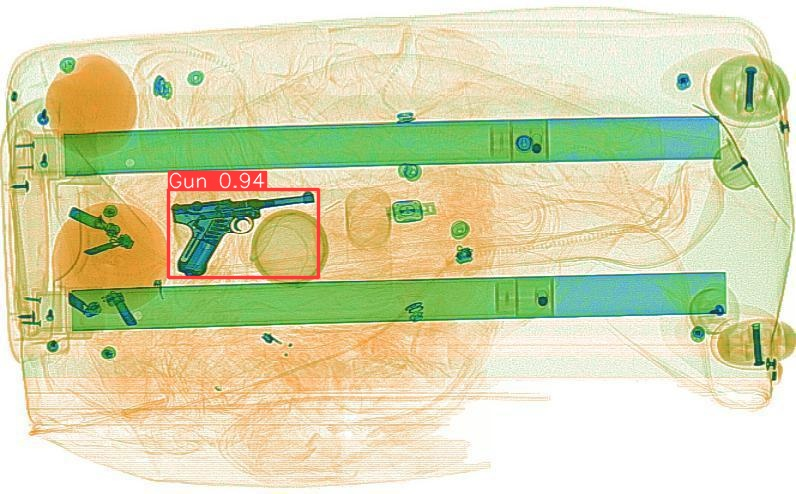

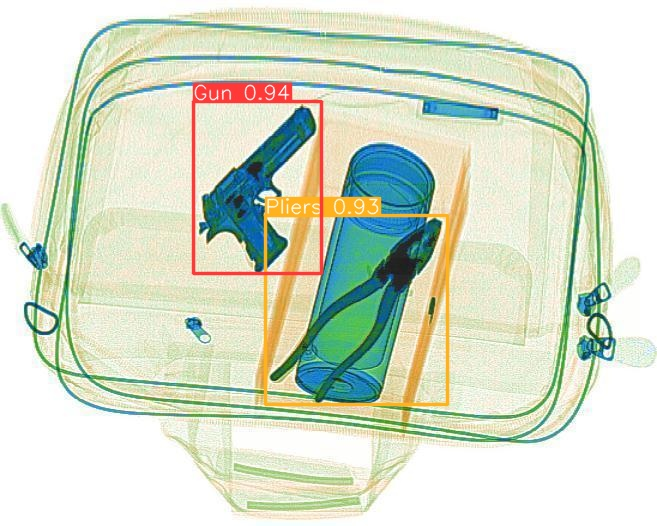

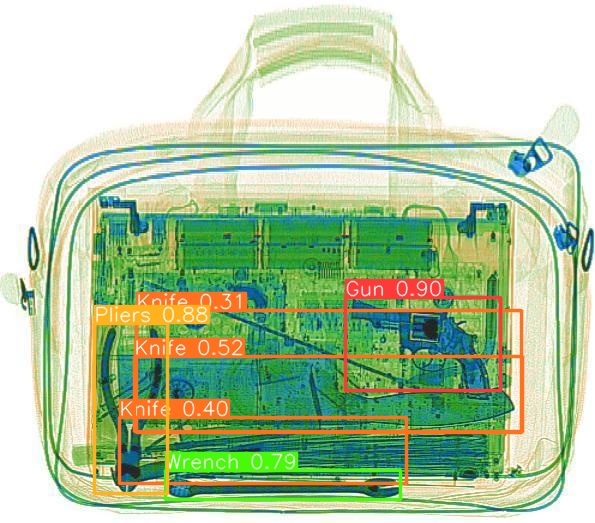

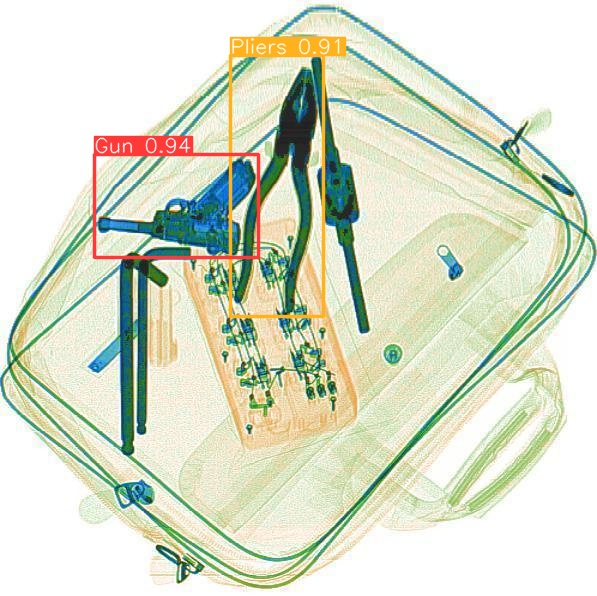

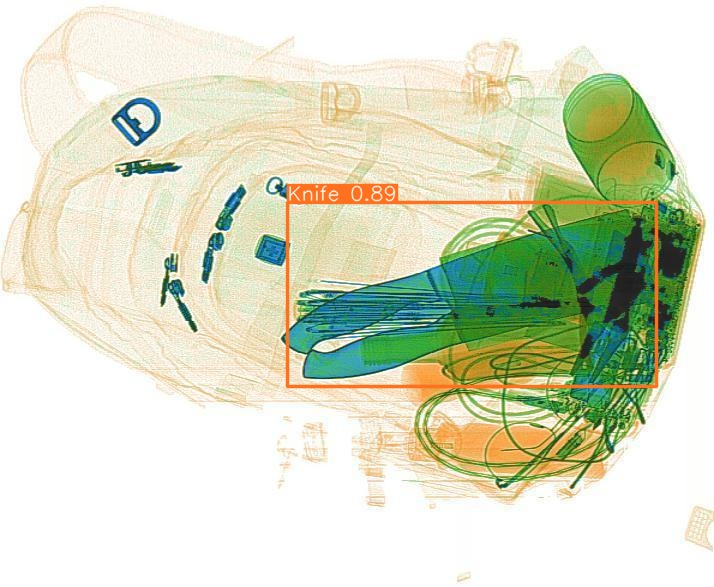

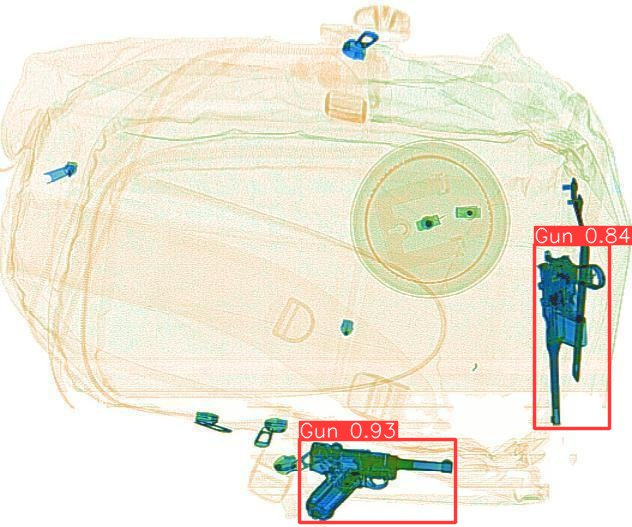

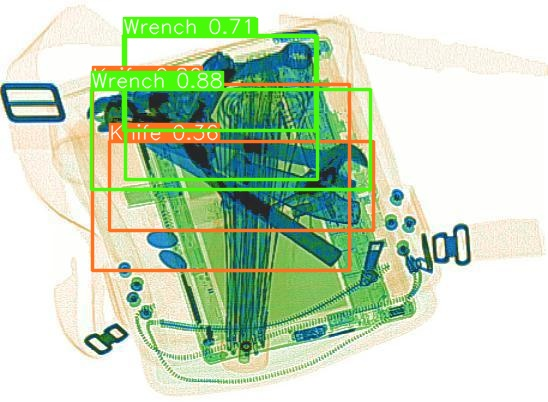

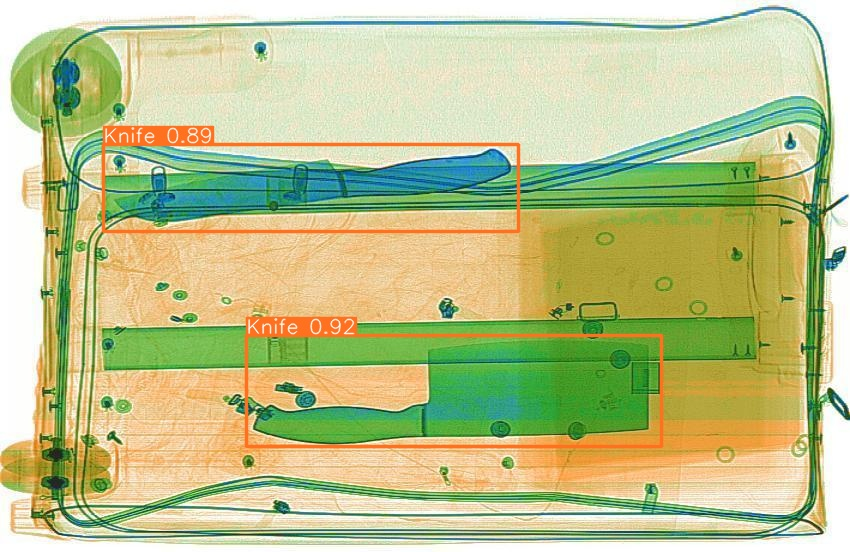

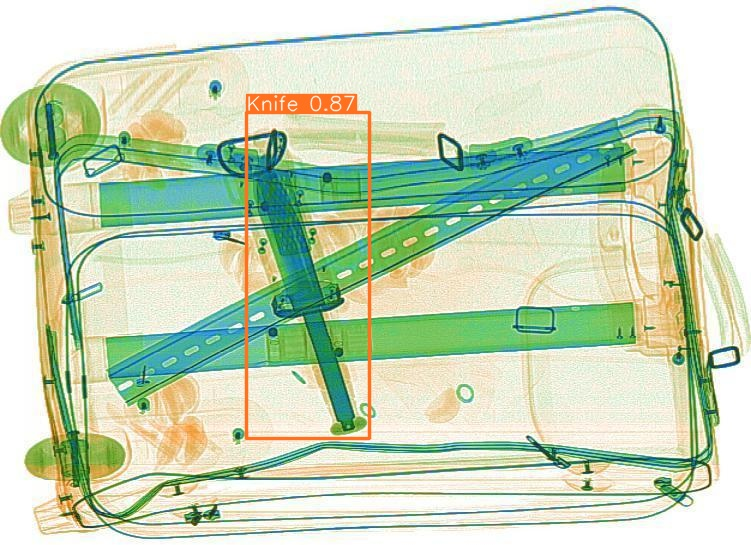

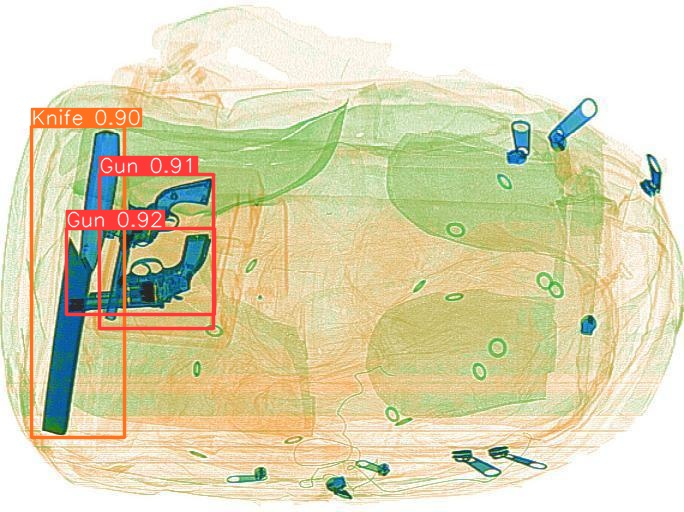

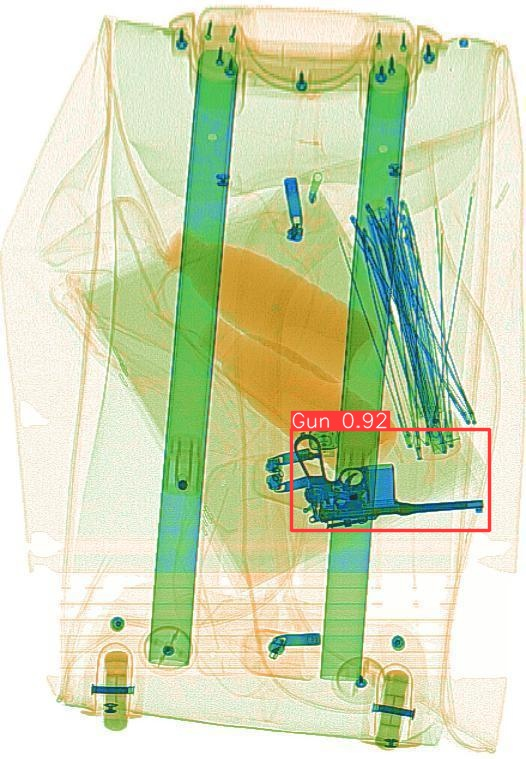

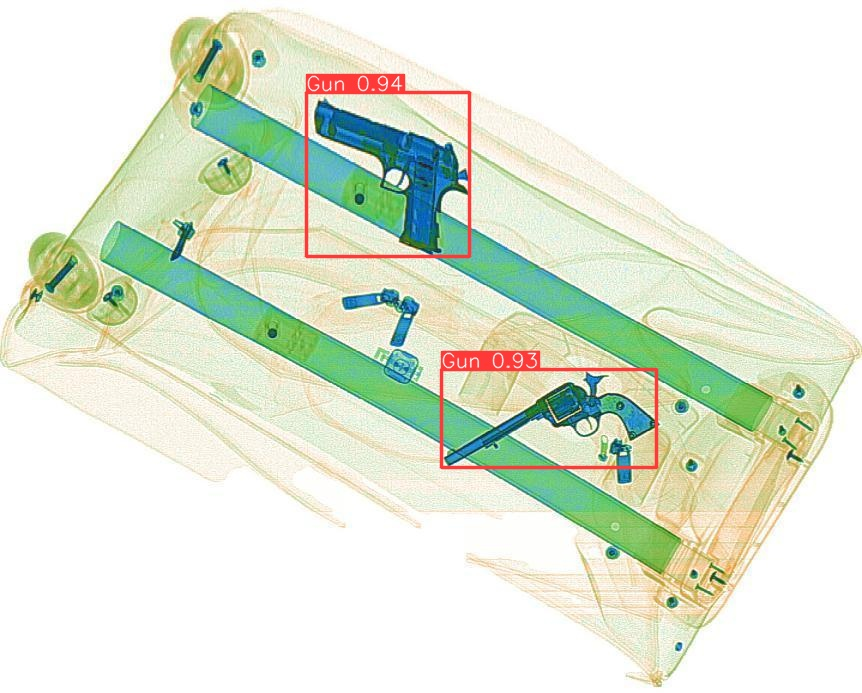

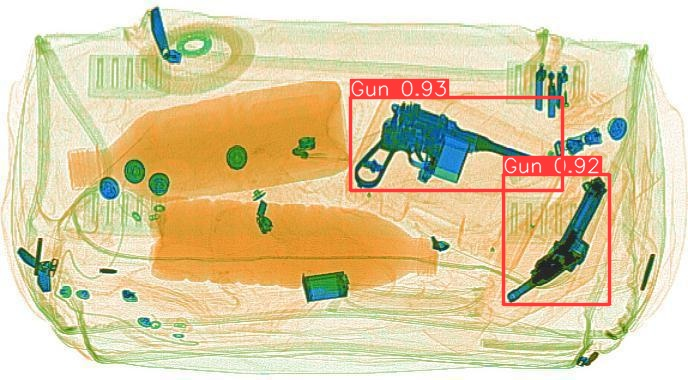

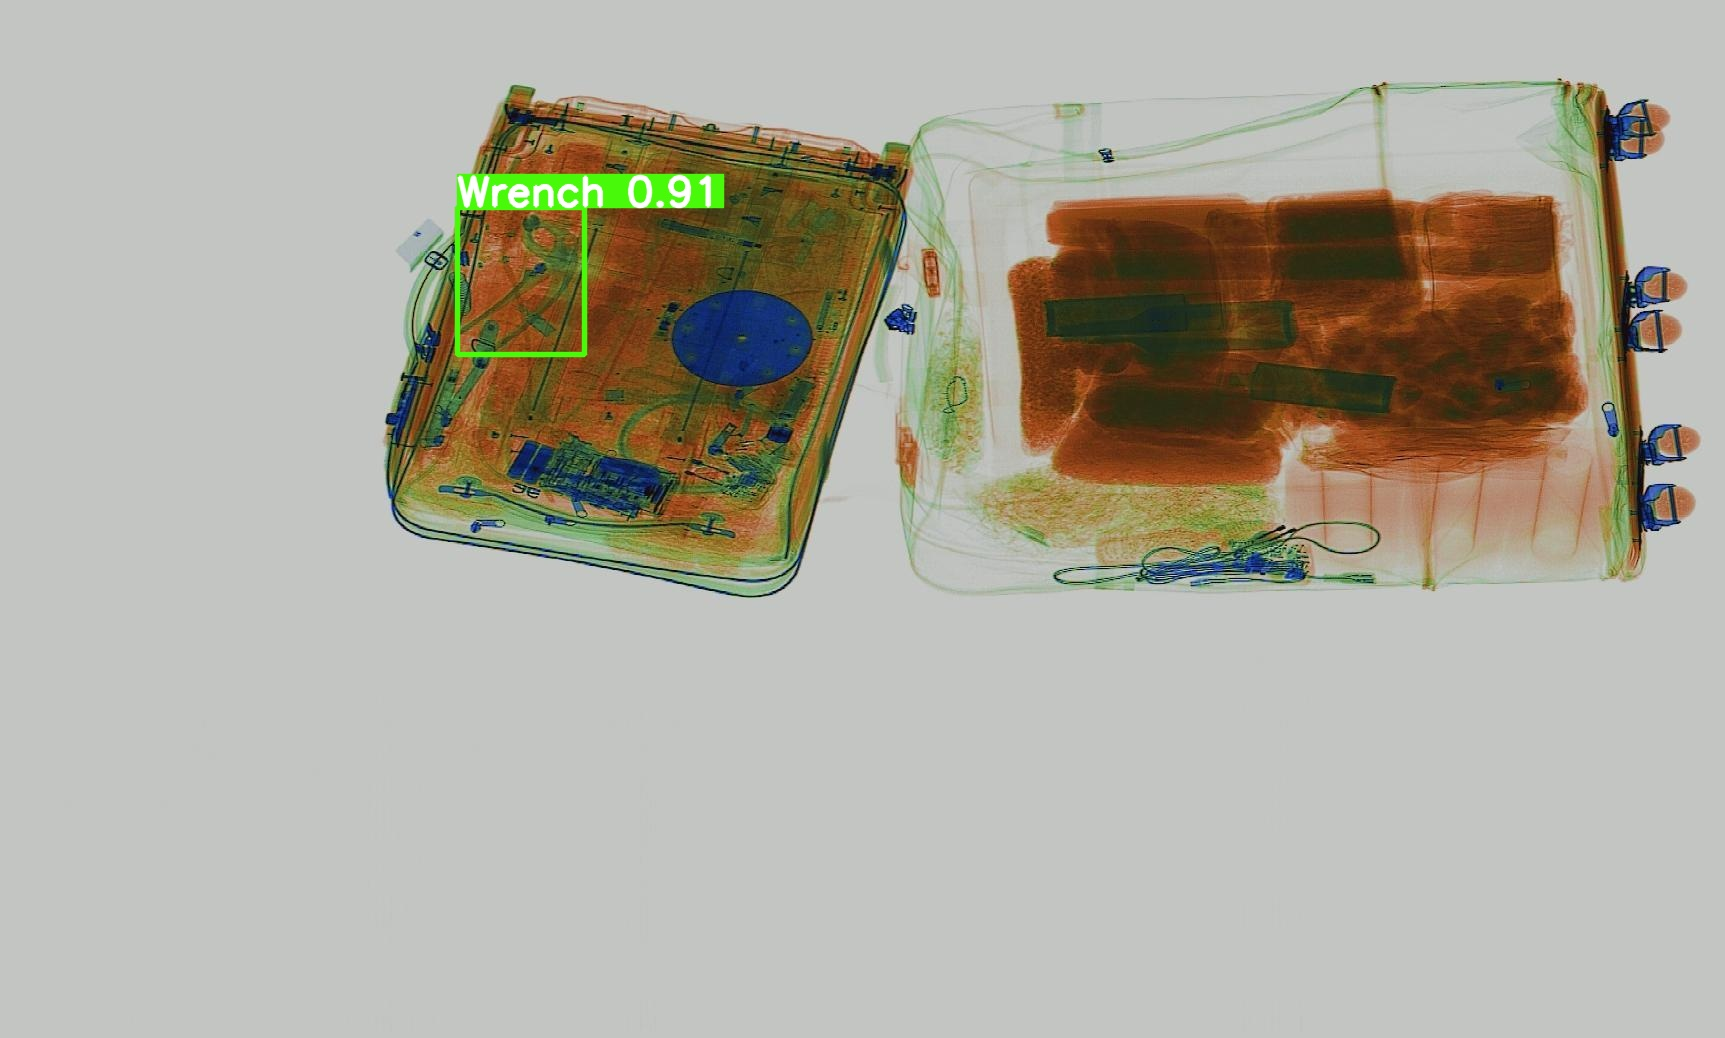

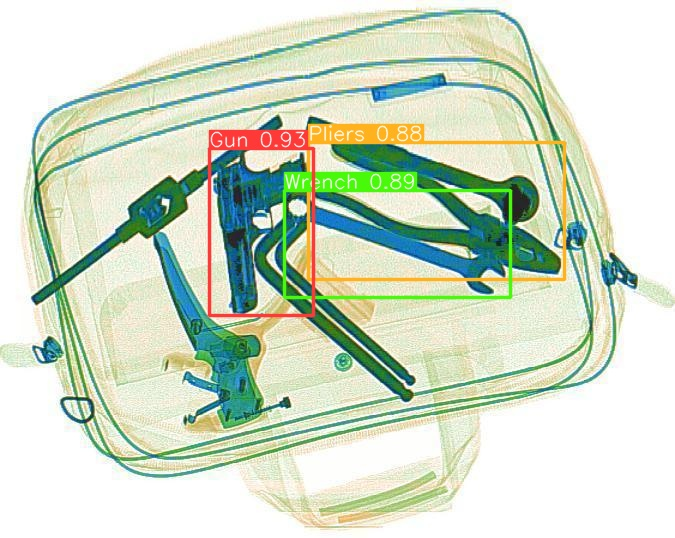

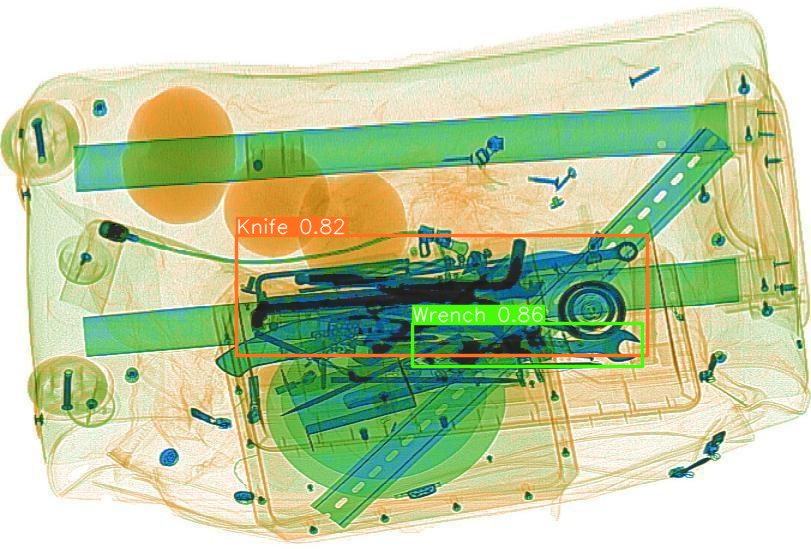

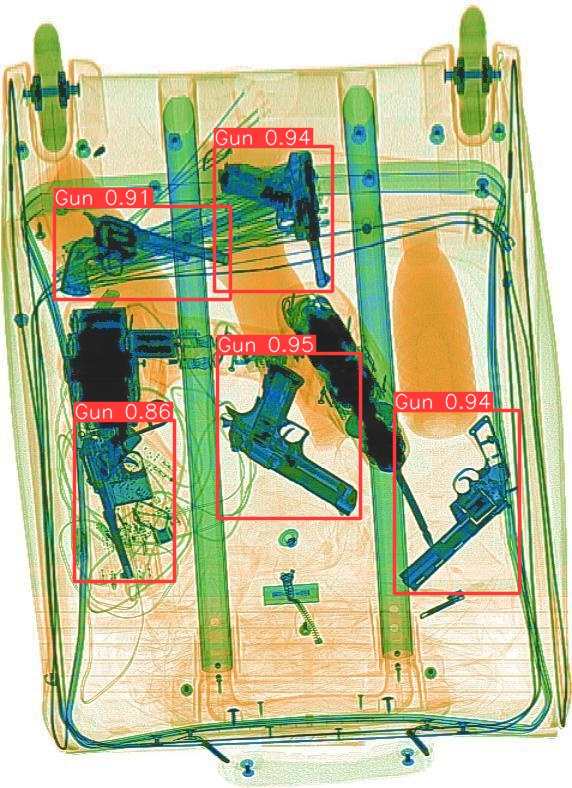

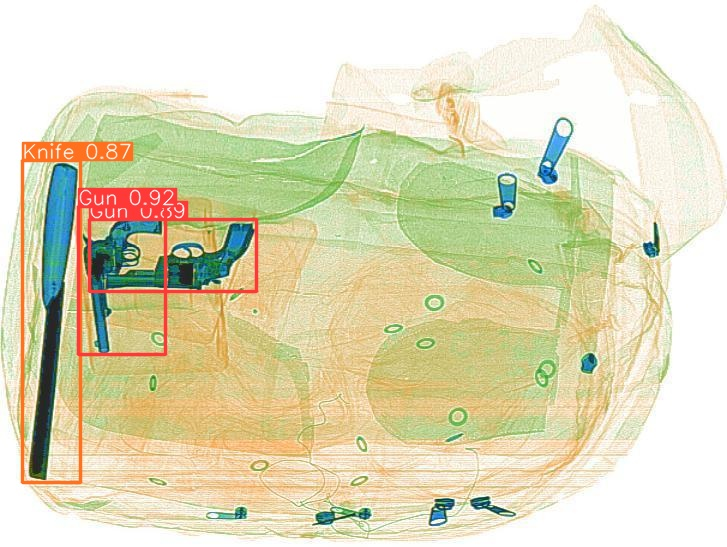

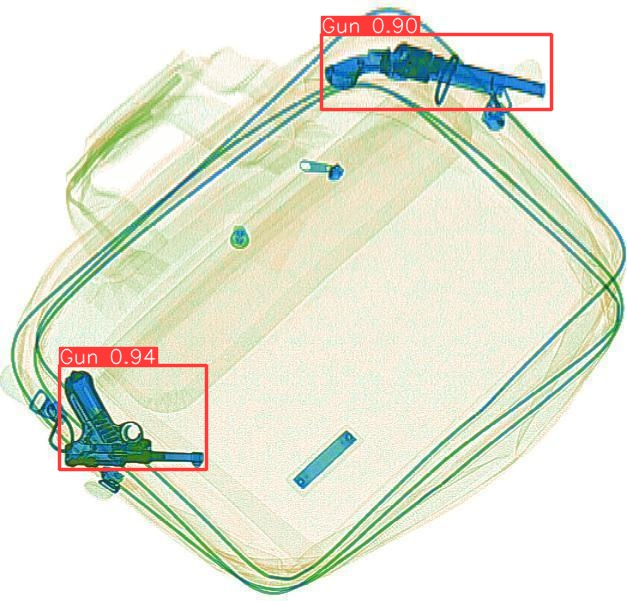

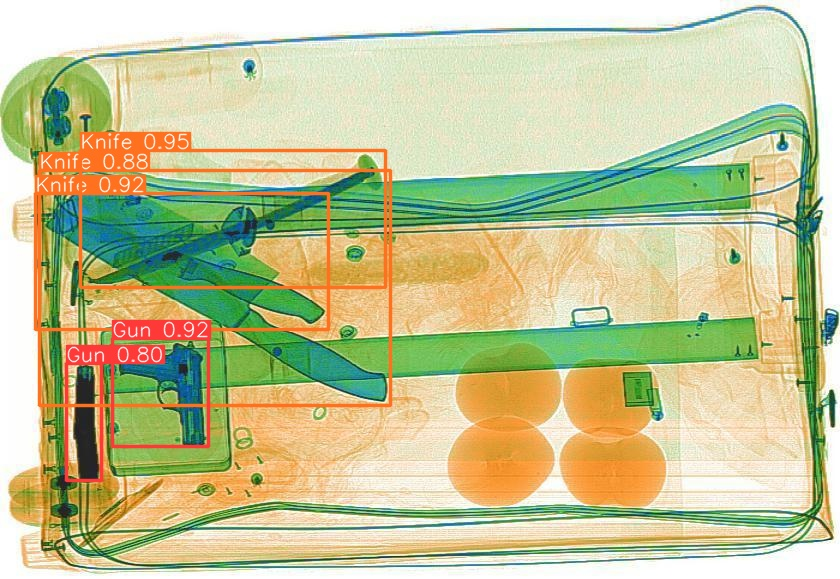

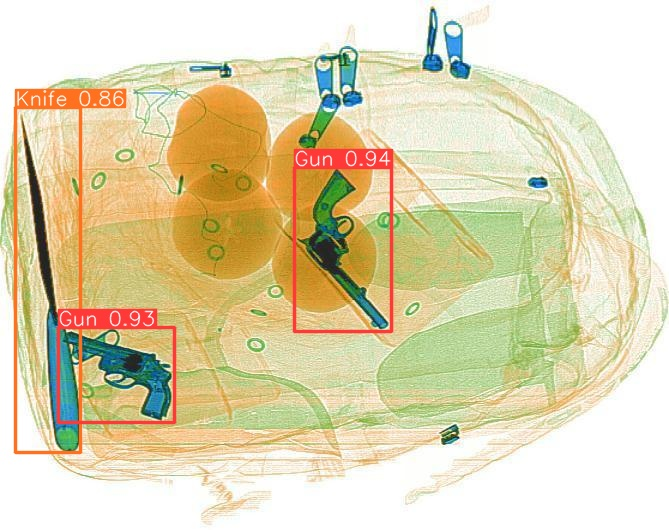

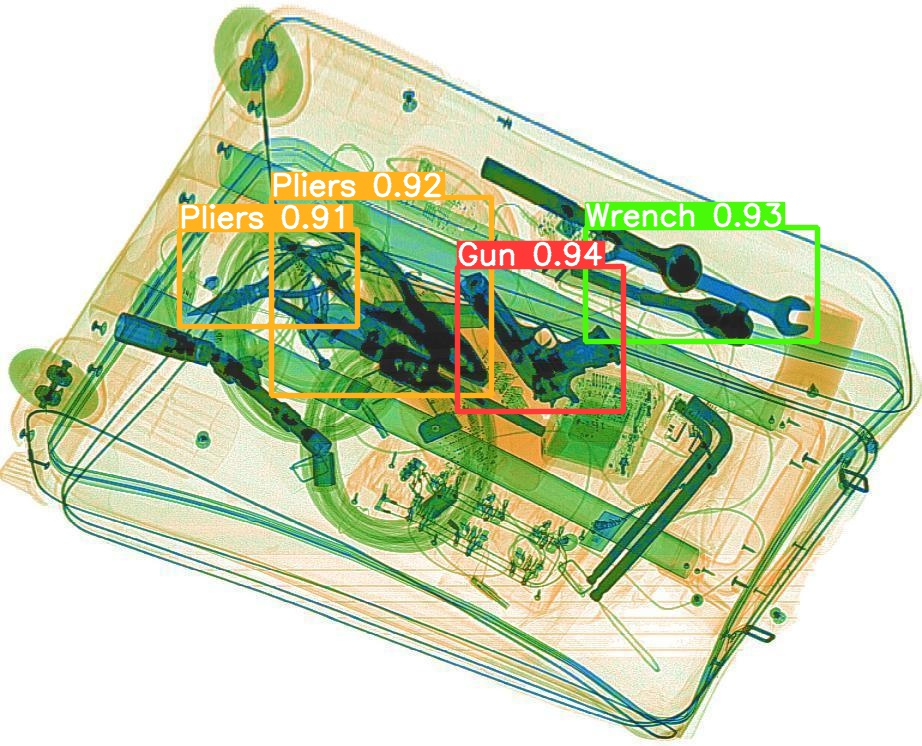

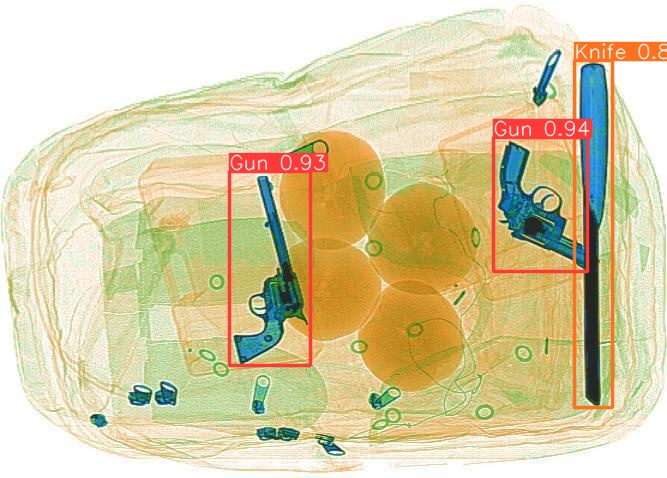

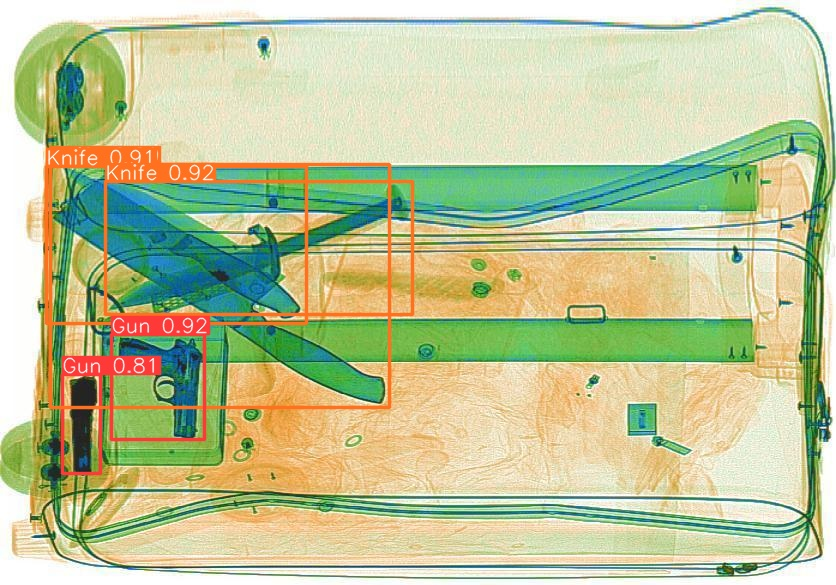

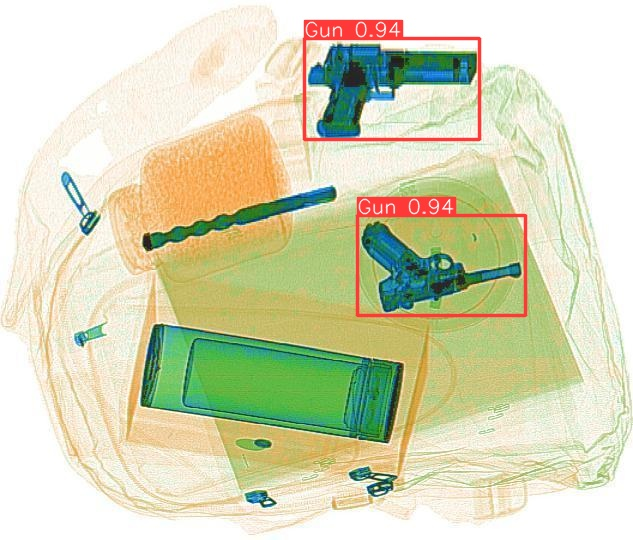

In [10]:
yolo8_model_detection=YOLO('/kaggle/working/YOLO_weights/SIXray_Output/weights/best.pt')
yolo8_model_detection.predict(source='/kaggle/working/weapon_detection-4/test/images', save=True )
from IPython.display import Image, display
import os
res_path='runs/detect/predict'
for image in os.listdir(res_path)[-25:]: # Displaying only 10 results
  # print(os.path.join(res_path,image))
  display(Image(filename=os.path.join(res_path,image), height=300,width=500))

# **MODEL BENCHMARK**

In [ ]:
from ultralytics.utils.benchmarks import benchmark

# Benchmark on GPU with training configurations
benchmark(model= yolo8_model_detection, data='/kaggle/working/datasets/sixray100-1/data.yaml', imgsz=640, half=False, device=0)



image 1/1 /opt/conda/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 9 Guns, 14.7ms
Speed: 2.5ms preprocess, 14.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)
ERROR ❌️ Benchmark failure for PyTorch: '/kaggle/working/datasets/sixray100-1/data.yaml' does not exist

PyTorch: starting from '/kaggle/working/YOLO_weights/SIXray_Output/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 10, 8400) (49.6 MB)

TorchScript: starting export with torch 2.0.0...
TorchScript: export success ✅ 2.2s, saved as '/kaggle/working/YOLO_weights/SIXray_Output/weights/best.torchscript' (99.1 MB)

Export complete (2.3s)
Results saved to /kaggle/working/YOLO_weights/SIXray_Output/weights
Predict:         yolo predict task=detect model=/kaggle/working/YOLO_weights/SIXray_Output/weights/best.torchscript imgsz=640  
Validate:        yolo val task=detect model=/kaggle/working/YOLO_weights/SIXray_Output/weights/best.torchscript imgsz=640 data=/kaggle

In [2]:
!zip -r runs.zip /kaggle/working/runs

  adding: kaggle/working/runs/ (stored 0%)
  adding: kaggle/working/runs/detect/ (stored 0%)
  adding: kaggle/working/runs/detect/predict/ (stored 0%)
  adding: kaggle/working/runs/detect/predict/P02025_jpg.rf.26f89614e29d03148877887df4215407.jpg (deflated 5%)
  adding: kaggle/working/runs/detect/predict/P02340_jpg.rf.4f9ebd7c0bc8e8413186e55e5fe5ad58.jpg (deflated 12%)
  adding: kaggle/working/runs/detect/predict/P02376_jpg.rf.7528b7f884ec5b53124713220ab5cff4.jpg (deflated 5%)
  adding: kaggle/working/runs/detect/predict/P02012_jpg.rf.8a1c1bd19c01f7ba7e995c3e307d993d.jpg (deflated 5%)
  adding: kaggle/working/runs/detect/predict/P01418_jpg.rf.31051fe21d2a94d82c1a730679060c15.jpg (deflated 5%)
  adding: kaggle/working/runs/detect/predict/P01644_jpg.rf.eb037946c5844b1b7d19df2a8b053788.jpg (deflated 4%)
  adding: kaggle/working/runs/detect/predict/P00707_jpg.rf.b9bf72a6ad276ed94e9923dacbb01890.jpg (deflated 4%)
  adding: kaggle/working/runs/detect/predict/P01832_jpg.rf.38436ee18efae1fe4f8